In [51]:
import numpy as np
from scipy.special import factorial

In [89]:
def compute_X_k_average(arr, k):
    arr = [i**k for i in arr]
    return np.mean(arr)

def compute_even_dist_stat(arr, k):
    return np.power((compute_X_k_average(arr, k) * (k+1)), (1/k))

def compute_exp_dist_stat(arr, k):
    return np.power(compute_X_k_average(arr, k)/factorial(k), 1/k)

In [104]:
n = 1000 # Размер выборки
theta = 20 # Параметр для равномерного распределения
lamb = 2 # Экспонента
m = 10000 # Количество генераций выборок
np.random.seed(42)

Считаем для каждого k матожидание ошибки на m выборках

In [105]:
k_list = np.arange(1, 101)
uni_k_arr = []
for k in k_list:
    stat_theta = []
    for i in range(m):
        samples_uni = np.random.uniform(0, theta, n)
        value = compute_even_dist_stat(samples_uni, k)
        stat_theta.append(np.power(value - theta, 2))
    uni_k_arr.append(np.mean(stat_theta))

exp_k_arr = []
for k in k_list:
    stat_lamb = []
    for i in range(m):
        samples_uni = np.random.exponential(1/lamb, n)
        value = compute_exp_dist_stat(samples_uni, k)
        stat_lamb.append(np.power(value - lamb, 2))
    exp_k_arr.append(np.mean(stat_lamb))

In [102]:
%matplotlib inline
import matplotlib.pyplot as plt

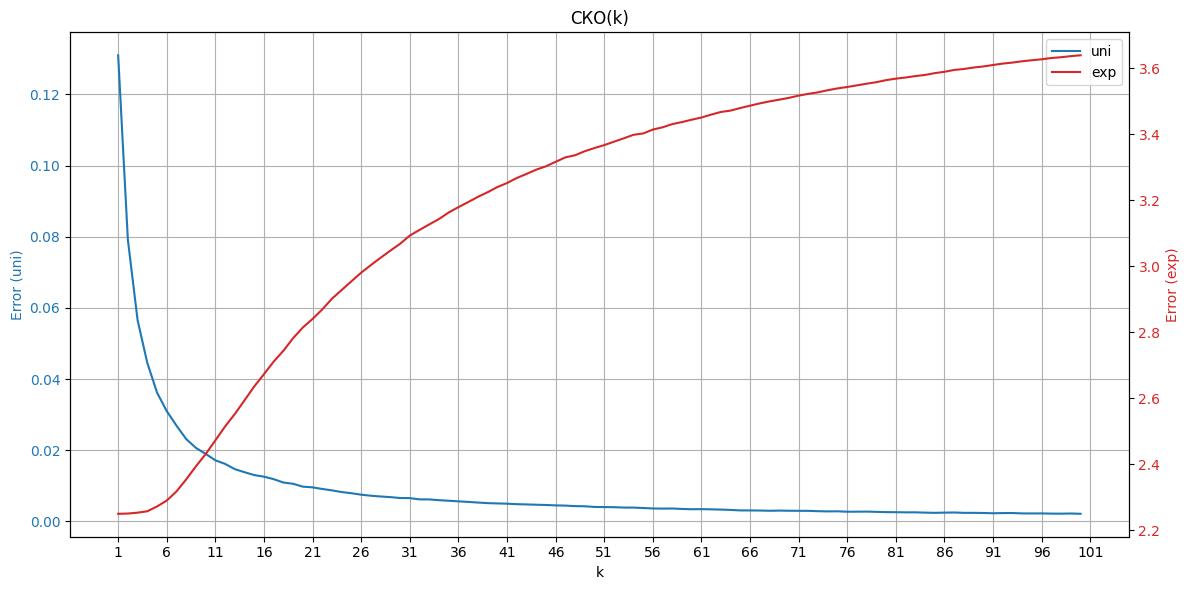

In [107]:
# some neuro code for graph
fig, ax1 = plt.subplots(figsize=(12, 6))

color1 = 'tab:blue'
line1, = ax1.plot(k_list, uni_k_arr, color=color1, label='uni')
ax1.set_xlabel('k')
ax1.set_ylabel('Error (uni)', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True)

ax2 = ax1.twinx()
color2 = 'tab:red'
line2, = ax2.plot(k_list, exp_k_arr, color=color2, label='exp')
ax2.set_ylabel('Error (exp)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

ax1.set_xticks(range(1, 102, 5))

lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper right')

plt.title('СКО(k)')
fig.tight_layout()
plt.show()

<b>Небольшой итог: для равномерного распределения подходят большие k. Для экспоненциального лучше придерживаться малых k